Notebook computes the original analysis and saves the error free data. Then, the data is run through the network simulator to generate undetected errors and it read again to compute the analysis to test our hypothesis if this impacts scientific conclusions. 

In [12]:
# Necessary installs
!pip install astroML


In [1]:
# Necessary imports
import numpy as np
from matplotlib import pyplot as plt
from astroML.datasets import fetch_moving_objects
from astroML.plotting.tools import devectorize_axes

/Users/prateek/opt/anaconda3/lib/python3.9/site-packages/astroML/linear_model/linear_regression_errors.py:10: UserWarning: LinearRegressionwithErrors requires PyMC3 to be installed
  warnings.warn('LinearRegressionwithErrors requires PyMC3 to be installed')


In [2]:
# Helper functions
def black_bg_subplot(*args, **kwargs):
    """Create a subplot with black background"""
    kwargs['facecolor'] = 'k'
    ax = plt.subplot(*args, **kwargs)

    # set ticks and labels to white
    for spine in ax.spines.values():
        spine.set_color('w')

    for tick in ax.xaxis.get_major_ticks() + ax.yaxis.get_major_ticks():
        for child in tick.get_children():
            child.set_color('w')

    return ax

def compute_color(mag_a, mag_i, mag_z, a_crit=-0.1):
    """
    Compute the scatter-plot color using code adapted from
    TCL source used in Parker 2008.
    """
    # define the base color scalings
    R = np.ones_like(mag_i)
    G = 0.5 * 10 ** (-2 * (mag_i - mag_z - 0.01))
    B = 1.5 * 10 ** (-8 * (mag_a + 0.0))

    # enhance green beyond the a_crit cutoff
    G += 10. / (1 + np.exp((mag_a - a_crit) / 0.02))

    # normalize color of each point to its maximum component
    RGB = np.vstack([R, G, B])
    RGB /= RGB.max(0)

    # return an array of RGB colors, which is shape (n_points, 3)
    return RGB.T

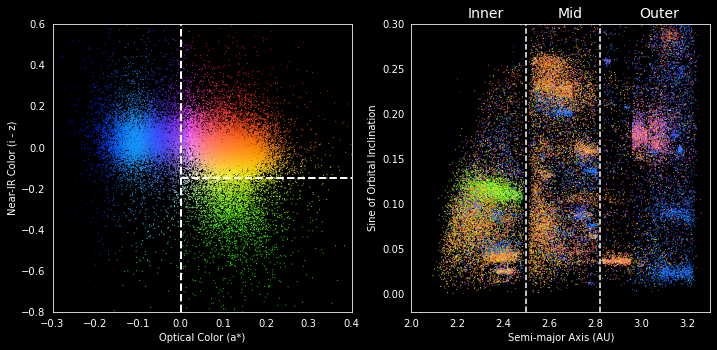

33160


In [3]:
# Original data analysis
# Taken from https://jhepc.github.io/2013/entry3/index.html
# Fetch data and extract the desired quantities
data = fetch_moving_objects(Parker2008_cuts=True)
mag_a = data['mag_a']
mag_i = data['mag_i']
mag_z = data['mag_z']
a = data['aprime']
sini = data['sin_iprime']

# dither: magnitudes are recorded only to ± 0.01
mag_a += -0.005 + 0.01 * np.random.random(size=mag_a.shape)
mag_i += -0.005 + 0.01 * np.random.random(size=mag_i.shape)
mag_z += -0.005 + 0.01 * np.random.random(size=mag_z.shape)

# compute RGB color based on magnitudes
color = compute_color(mag_a, mag_i, mag_z)

#------------------------------------------------------------
# set up the plot
fig = plt.figure(figsize=(10.5, 5), facecolor='k')
fig.subplots_adjust(left=0.08, right=0.95, wspace=0.2,
                    bottom=0.1, top=0.9)

# plot the color-magnitude plot
ax = black_bg_subplot(121)
ax.scatter(mag_a, mag_i - mag_z,
           c=color, s=1, lw=0, edgecolors=color)

# uncomment to convert SVG points to pixels
#devectorize_axes(ax, dpi=400)

ax.plot([0, 0], [-0.8, 0.6], '--w', lw=2)
ax.plot([0, 0.4], [-0.15, -0.15], '--w', lw=2)

ax.set_xlim(-0.3, 0.4)
ax.set_ylim(-0.8, 0.6)

ax.set_xlabel('Optical Color (a*)', color='w')
ax.set_ylabel('Near-IR Color (i - z)', color='w')

# plot the orbital parameters plot
ax = black_bg_subplot(122)
ax.scatter(a, sini,
           c=color, s=1, lw=0, edgecolors=color)

# uncomment to convert SVG points to pixels
#devectorize_axes(ax, dpi=400)

ax.plot([2.5, 2.5], [-0.02, 0.3], '--w')
ax.plot([2.82, 2.82], [-0.02, 0.3], '--w')

ax.set_xlim(2.0, 3.3)
ax.set_ylim(-0.02, 0.3)

ax.set_xlabel('Semi-major Axis (AU)', color='w')
ax.set_ylabel('Sine of Orbital Inclination', color='w')

# label the plot
text_kwargs = dict(color='w', fontsize=14,
                   transform=plt.gca().transAxes,
                   ha='center', va='bottom')

ax.text(0.25, 1.01, 'Inner', **text_kwargs)
ax.text(0.53, 1.01, 'Mid', **text_kwargs)
ax.text(0.83, 1.01, 'Outer', **text_kwargs)

# # Saving the black-background figure requires some extra arguments:
# fig.savefig('asteroids.pdf',
#             facecolor='black',
#             edgecolor='none')

plt.show()
print(len(data))

In [16]:
# Save data with no errors
np.savetxt('astroMLData.txt', data, delimiter=',', fmt='%s', header=','.join(data.dtype.names))

In [17]:
# Take this data and run it through the simulator

# Then, rename OutputFile to astroMLDataWithErrors.txt

In [4]:
# Load data with undetected errors
data = np.genfromtxt("astroMLDataLargeWithErrors.csv", delimiter=',', dtype=None, invalid_raise=False, names = True)

/var/folders/qm/k2zk6b4d5t9fh0mwvwmwldbw0000gn/T/ipykernel_27321/2055709520.py:2: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  data = np.genfromtxt("astroMLDataLargeWithErrors.csv", delimiter=',', dtype=None, invalid_raise=False, names = True)


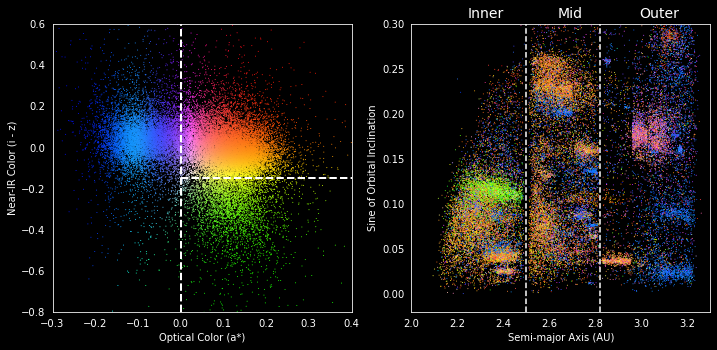

33160


In [5]:
# Rerun results with data with undetected errors
# Fetch data and extract the desired quantities
mag_a = data['mag_a']
mag_i = data['mag_i']
mag_z = data['mag_z']
a = data['aprime']
sini = data['sin_iprime']

# dither: magnitudes are recorded only to ± 0.01
mag_a += -0.005 + 0.01 * np.random.random(size=mag_a.shape)
mag_i += -0.005 + 0.01 * np.random.random(size=mag_i.shape)
mag_z += -0.005 + 0.01 * np.random.random(size=mag_z.shape)

# compute RGB color based on magnitudes
color = compute_color(mag_a, mag_i, mag_z)

#------------------------------------------------------------
# set up the plot
fig = plt.figure(figsize=(10.5, 5), facecolor='k')
fig.subplots_adjust(left=0.08, right=0.95, wspace=0.2,
                    bottom=0.1, top=0.9)

# plot the color-magnitude plot
ax = black_bg_subplot(121)
ax.scatter(mag_a, mag_i - mag_z,
           c=color, s=1, lw=0, edgecolors=color)

# uncomment to convert SVG points to pixels
#devectorize_axes(ax, dpi=400)

ax.plot([0, 0], [-0.8, 0.6], '--w', lw=2)
ax.plot([0, 0.4], [-0.15, -0.15], '--w', lw=2)

ax.set_xlim(-0.3, 0.4)
ax.set_ylim(-0.8, 0.6)

ax.set_xlabel('Optical Color (a*)', color='w')
ax.set_ylabel('Near-IR Color (i - z)', color='w')

# plot the orbital parameters plot
ax = black_bg_subplot(122)
ax.scatter(a, sini,
           c=color, s=1, lw=0, edgecolors=color)

# uncomment to convert SVG points to pixels
#devectorize_axes(ax, dpi=400)

ax.plot([2.5, 2.5], [-0.02, 0.3], '--w')
ax.plot([2.82, 2.82], [-0.02, 0.3], '--w')

ax.set_xlim(2.0, 3.3)
ax.set_ylim(-0.02, 0.3)

ax.set_xlabel('Semi-major Axis (AU)', color='w')
ax.set_ylabel('Sine of Orbital Inclination', color='w')

# label the plot
text_kwargs = dict(color='w', fontsize=14,
                   transform=plt.gca().transAxes,
                   ha='center', va='bottom')

ax.text(0.25, 1.01, 'Inner', **text_kwargs)
ax.text(0.53, 1.01, 'Mid', **text_kwargs)
ax.text(0.83, 1.01, 'Outer', **text_kwargs)

# # Saving the black-background figure requires some extra arguments:
# fig.savefig('asteroidsWithErrors.pdf',
#             facecolor='black',
#             edgecolor='none')

plt.show()
print(len(data))

In [9]:
import pandas as pd

file1 = "astroMLDataLarge.csv"
file2 = "astroMLDataLargeWithErrors.csv"
df1 = pd.read_csv(file1)
df2 = pd.read_csv(file2)


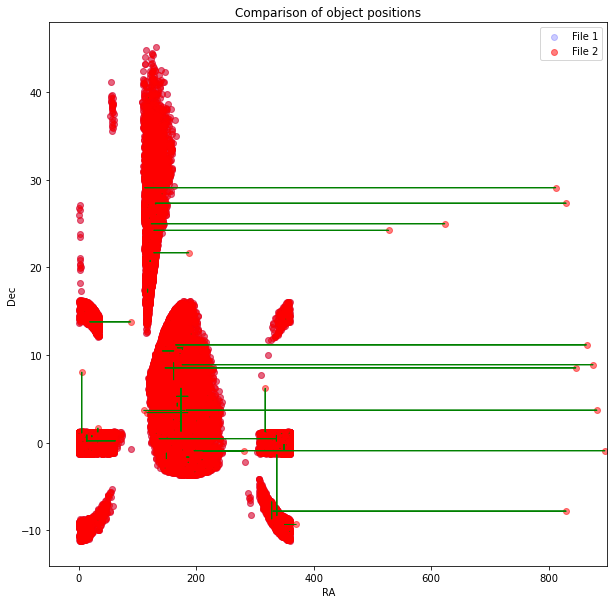

In [11]:
# For simplicity, let's say we're comparing the 'ra' and 'dec' columns
ra1, dec1 = df1['ra'], df1['dec']
ra2, dec2 = df2['ra'], df2['dec']

# Now we create the scatter plot
plt.figure(figsize=(10, 10))
plt.scatter(df1['ra'], df1['dec'], color='blue', label='File 1', alpha=0.2)
plt.scatter(df2['ra'], df2['dec'], color='red', label='File 2', alpha=0.5)

# Draw lines or arrows connecting the points from dataset 1 to dataset 2
for r1, d1, r2, d2 in zip(ra1, dec1, ra2, dec2):
    if r2 != r1 or d2 != d1:
        plt.arrow(r1, d1, r2-r1, d2-d1, color='green')

plt.xlabel('RA')
plt.ylabel('Dec')
plt.title('Comparison of object positions')
plt.legend()

# Fix x-axis scale
plt.xlim(-50, 900)

plt.show()


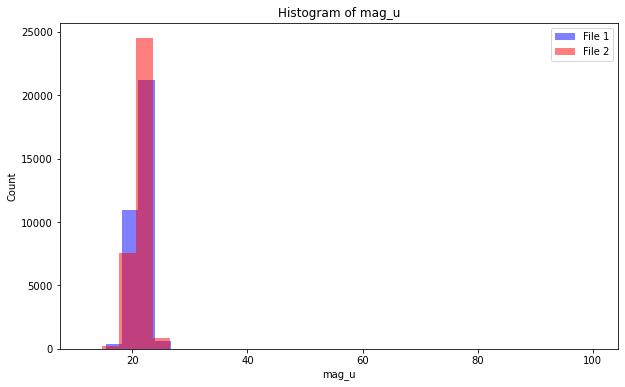

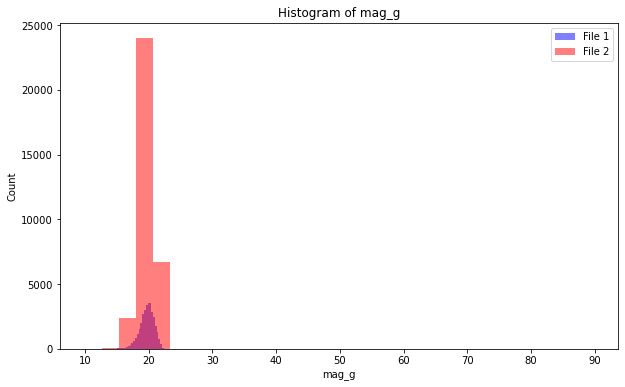

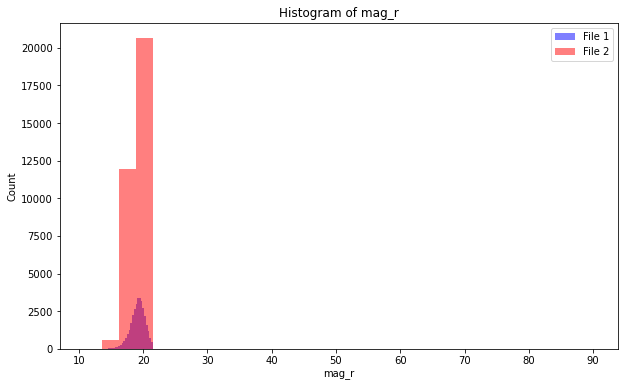

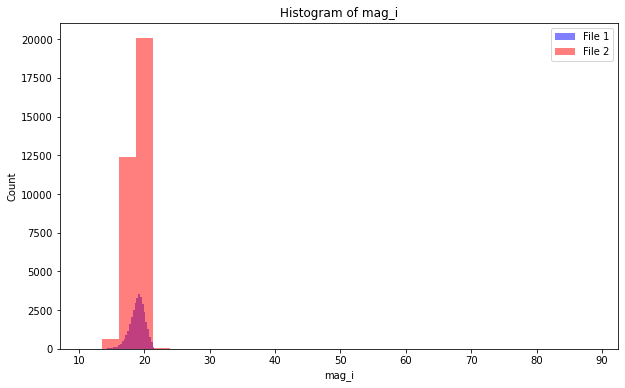

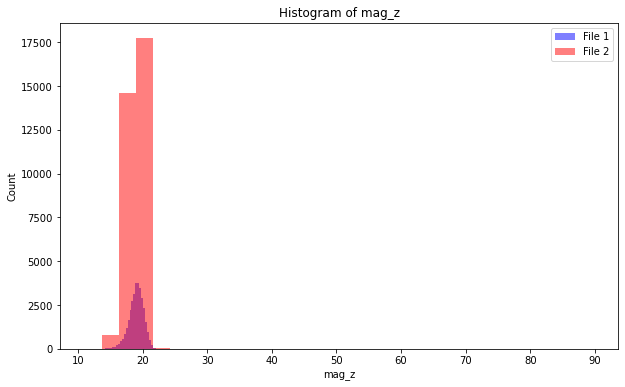

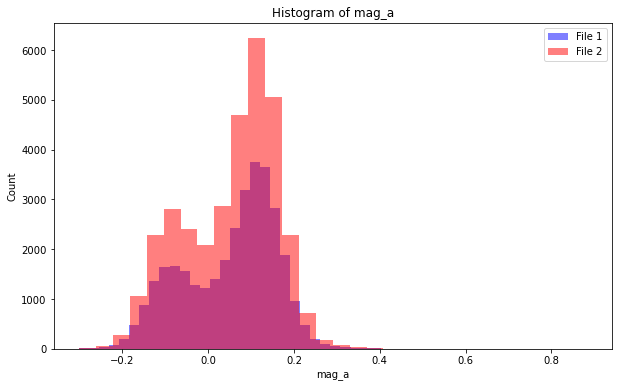

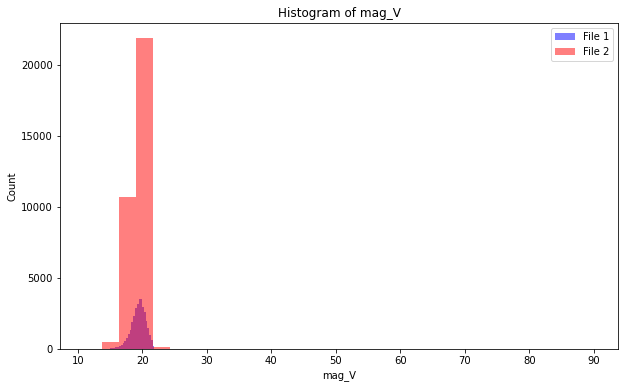

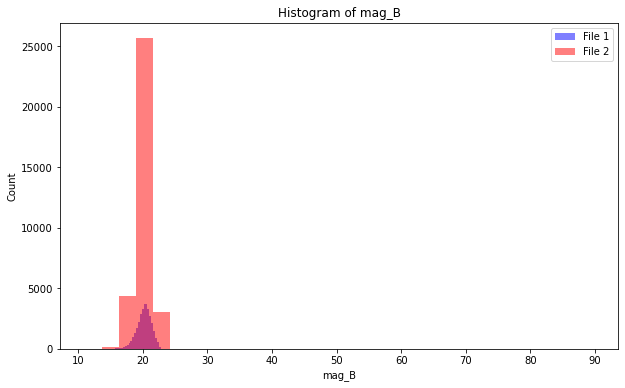

In [13]:
magnitudes = ['mag_u', 'mag_g', 'mag_r', 'mag_i', 'mag_z', 'mag_a', 'mag_V', 'mag_B']
for mag in magnitudes:
    plt.figure(figsize=(10, 6))
    plt.hist(df1[mag], bins=30, alpha=0.5, label='File 1', color='blue')
    plt.hist(df2[mag], bins=30, alpha=0.5, label='File 2', color='red')
    plt.xlabel(mag)
    plt.ylabel('Count')
    plt.title('Histogram of {}'.format(mag))
    plt.legend()
    plt.show()

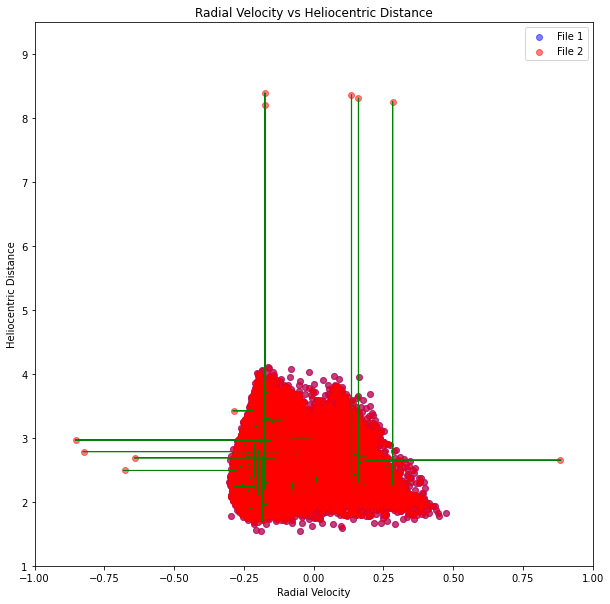

In [12]:

df1_vlambda_median = np.median(df1['vlambda'])
df1_r_helio_median = np.median(df1['r_helio'])
df2_vlambda_median = np.median(df2['vlambda'])
df2_r_helio_median = np.median(df2['r_helio'])

plt.figure(figsize=(10, 10))
plt.scatter(df1['vlambda'], df1['r_helio'], color='blue', label='File 1', alpha=0.5)
plt.scatter(df2['vlambda'], df2['r_helio'], color='red', label='File 2', alpha=0.5)
for vlambda1, r_helio1, vlambda2, r_helio2 in zip(df1['vlambda'], df1['r_helio'], df2['vlambda'], df2['r_helio']):
    if  vlambda2 != vlambda1 or r_helio2 != r_helio1:
        plt.arrow(vlambda1, r_helio1, vlambda2 - vlambda1, r_helio2 - r_helio1, color='green')
plt.xlabel('Radial Velocity')
plt.ylabel('Heliocentric Distance')
plt.title('Radial Velocity vs Heliocentric Distance')
plt.legend()

# Fix x-axis scale
plt.xlim(-1, 1)
plt.ylim(1, 9.5)

plt.show()
